# Exploring Structure in Network Metrics

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import geopandas as gpd

In [2]:
import statsmodels.formula.api as smf
import pandas as pd
import os
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import statsmodels.api as sm

In [5]:
import seaborn as sns

In [6]:
sns.set_context('paper')

In [7]:
sns.set_style('whitegrid')

In [8]:
import proplot as pplt

In [113]:
df = gpd.read_parquet("../data/model_data.parquet")

In [114]:
df = df[df.seg_difference>0]

In [100]:
df.columns

Index(['n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg',
       'streets_per_node_avg', 'intersection_count', 'street_length_total',
       'street_segment_count', 'street_length_avg', 'circuity_avg',
       'self_loop_proportion', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', 'node_props_dead_end',
       'node_props_3way', 'node_props_4way', 'name', 'planar_measure',
       'network_measure', 'seg_difference', 'p_value', 'ALAND', 'AWATER',
       'population', 'pop_density', 'geometry', 'cyclomatic', 'meshedness',
       'gamma', 'pct_diff', 'significant'],
      dtype='object')

In [74]:
from seg_networks import save_table

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/_data.py:66: UserWarning: The geosnap data storage class is provided for convenience only. The geosnap developers make no promises regarding data quality, consistency, or availability, nor are they responsible for any use/misuse of the data. The end-user is responsible for any and all analyses or applications created with the package.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### Read in the table of network variable descriptions and convert to latex for the paper

In [148]:
vartable = pd.read_csv("../data/network_variables.csv")

In [120]:
save_table(vartable.set_index('variable'),
    "../paper/tables/variables_wide.md",
    ref="tbl:variables",
    type='latex',
    caption="Network Topology Metrics",
    resize=True,
    landscape=False
)

In [149]:
# escape for latex

vartable.variable = vartable.variable.str.replace("_", "\_")

In [152]:
# you need to unset the max display length for pandas to ensure full output to latex

pd.set_option('display.max_colwidth', None)

In [153]:
vartable.to_latex(
    "../paper/tables/variables.md",
    escape=False,
    label="tbl:variables",
    caption="Network Topology Metrics",
    index=False,
    longtable=True,
    column_format='l|l|p{8cm}'
)

### Explore network features

In [115]:
features = [
    "k_avg",
    "streets_per_node_avg",
    "street_length_total",
    "street_segment_count",
    "street_length_avg",
    "street_density_km",
    "circuity_avg",
    "intersection_count",
    "intersection_density_km",
    "self_loop_proportion",
    "node_props_dead_end",
    "node_props_3way",
    "node_props_4way",
    "cyclomatic",
    "gamma",
    "meshedness",
    "ALAND",
    "AWATER",
    'population',
    'pop_density'
]

array([[<AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'m'}>,
        <AxesSubplot:title={'center':'k_avg'}>,
        <AxesSubplot:title={'center':'edge_length_total'}>,
        <AxesSubplot:title={'center':'edge_length_avg'}>,
        <AxesSubplot:title={'center':'streets_per_node_avg'}>],
       [<AxesSubplot:title={'center':'intersection_count'}>,
        <AxesSubplot:title={'center':'street_length_total'}>,
        <AxesSubplot:title={'center':'street_segment_count'}>,
        <AxesSubplot:title={'center':'street_length_avg'}>,
        <AxesSubplot:title={'center':'circuity_avg'}>,
        <AxesSubplot:title={'center':'self_loop_proportion'}>],
       [<AxesSubplot:title={'center':'node_density_km'}>,
        <AxesSubplot:title={'center':'intersection_density_km'}>,
        <AxesSubplot:title={'center':'edge_density_km'}>,
        <AxesSubplot:title={'center':'street_density_km'}>,
        <AxesSubplot:title={'center':'node_props_dead_end'}>,
        <Axes

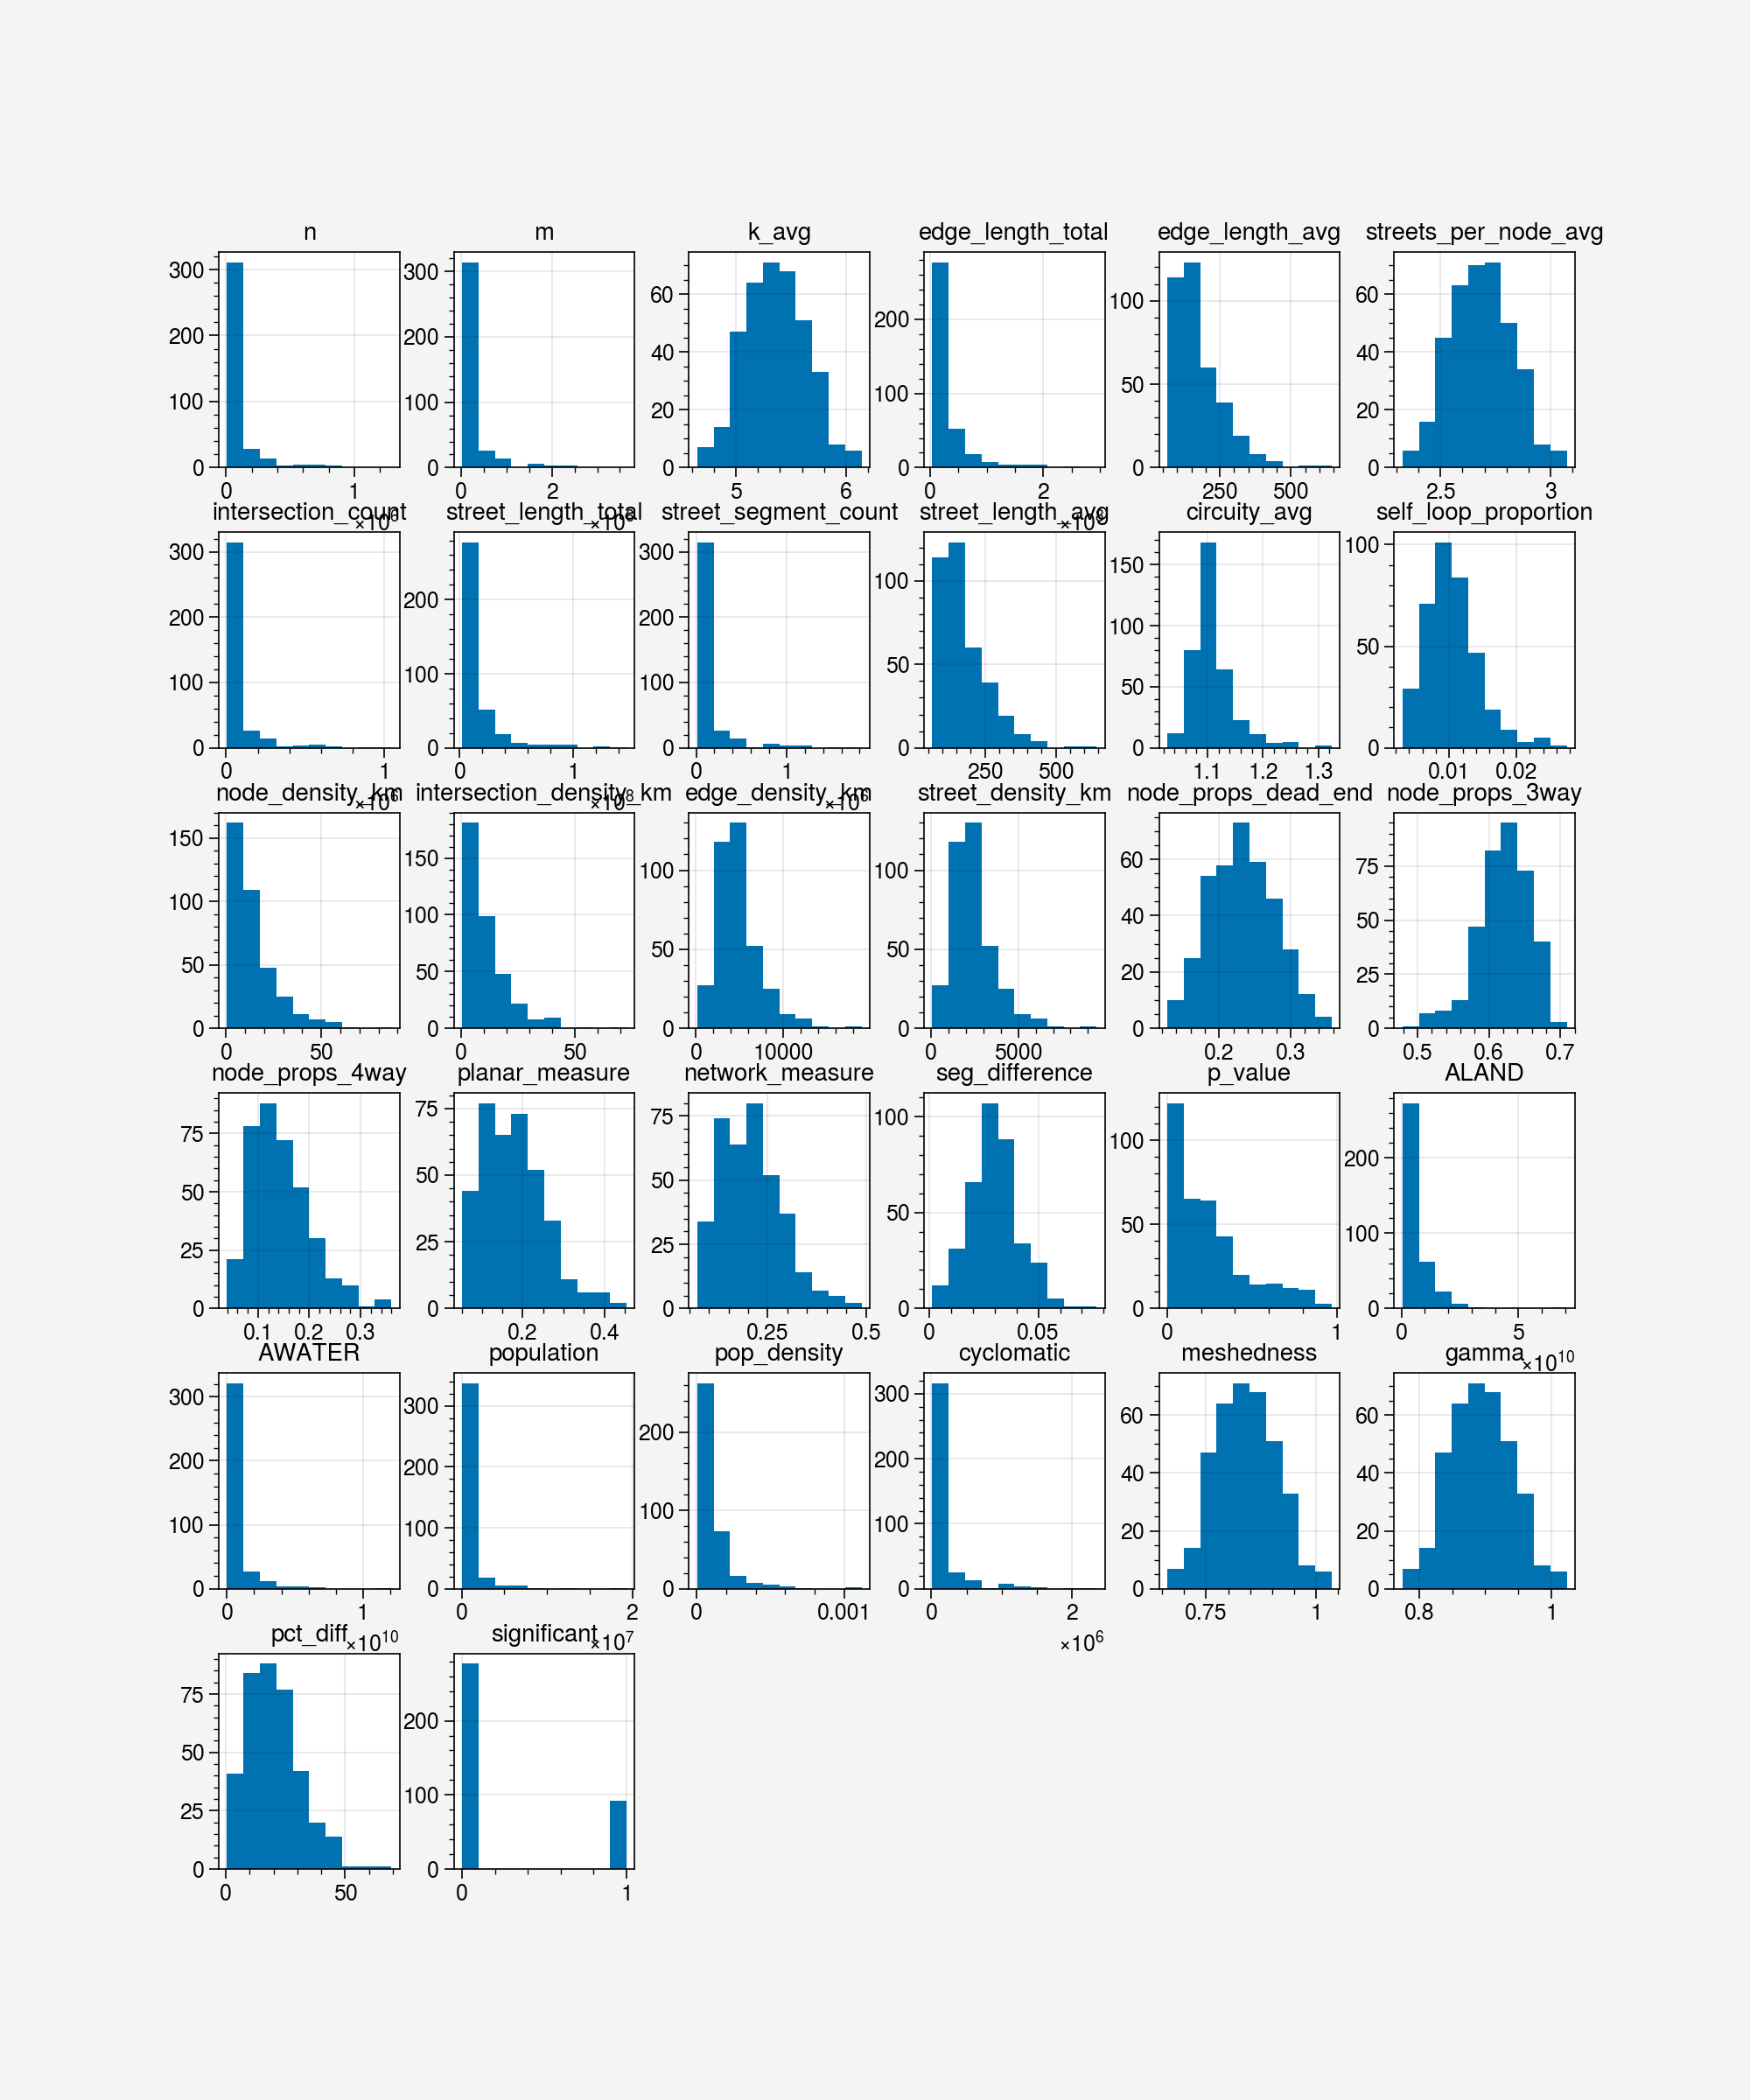

In [116]:
df.hist(figsize=(10,12))

Lots of exponential variables. Lets look at the correlation matrix

In [117]:
df[features].corr()

,k_avg,streets_per_node_avg,street_length_total,street_segment_count,street_length_avg,street_density_km,circuity_avg,intersection_count,intersection_density_km,self_loop_proportion,node_props_dead_end,node_props_3way,node_props_4way,cyclomatic,gamma,meshedness,ALAND,AWATER,population,pop_density
k_avg,1.000000,0.999798,0.170387,0.181012,-0.053056,-0.008494,-0.376983,0.182611,0.114672,-0.488984,-0.965240,-0.220369,0.907554,0.193692,1.000000,1.000000,0.188902,0.129778,0.157083,0.105471
streets_per_node_avg,0.999798,1.000000,0.161021,0.171556,-0.041471,-0.015412,-0.381333,0.173176,0.106023,-0.489158,-0.965334,-0.221009,0.908166,0.184317,0.999810,0.999810,0.182837,0.122578,0.149272,0.096715
street_length_total,0.170387,0.161021,1.000000,0.965883,-0.254474,0.427124,0.049346,0.966712,0.471083,-0.119514,-0.179678,0.061857,0.098910,0.963804,0.169911,0.169923,0.582197,0.327726,0.889648,0.560796
street_segment_count,0.181012,0.171556,0.965883,1.000000,-0.373398,0.537703,0.019798,0.999880,0.597011,-0.085536,-0.178487,0.017118,0.126662,0.999664,0.180567,0.180578,0.429818,0.378176,0.932338,0.680741
street_length_avg,-0.053056,-0.041471,-0.254474,-0.373398,1.000000,-0.613538,0.107982,-0.371761,-0.651558,-0.250062,0.015614,0.093091,-0.067930,-0.370320,-0.052547,-0.052562,0.130043,-0.207313,-0.294634,-0.505468
street_density_km,-0.008494,-0.015412,0.427124,0.537703,-0.613538,1.000000,0.011710,0.536056,0.958551,0.179401,0.008147,0.031620,-0.028469,0.534140,-0.008892,-0.008881,-0.163550,0.020835,0.469531,0.742751
circuity_avg,-0.376983,-0.381333,0.049346,0.019798,0.107982,0.011710,1.000000,0.018923,-0.007605,0.018480,0.388853,0.010562,-0.317901,0.016025,-0.377085,-0.377083,0.085276,-0.038101,0.013735,0.003398
intersection_count,0.182611,0.173176,0.966712,0.999880,-0.371761,0.536056,0.018923,1.000000,0.594923,-0.085621,-0.182004,0.024070,0.124991,0.999642,0.182167,0.182178,0.431323,0.378166,0.933227,0.680328
intersection_density_km,0.114672,0.106023,0.471083,0.597011,-0.651558,0.958551,-0.007605,0.594923,1.000000,0.113972,-0.095261,-0.045559,0.102388,0.595457,0.114243,0.114255,-0.075935,0.146542,0.519356,0.799957
self_loop_proportion,-0.488984,-0.489158,-0.119514,-0.085536,-0.250062,0.179401,0.018480,-0.085621,0.113972,1.000000,0.430525,0.262510,-0.509026,-0.092335,-0.489104,-0.489098,-0.258385,-0.056584,-0.104682,0.024065


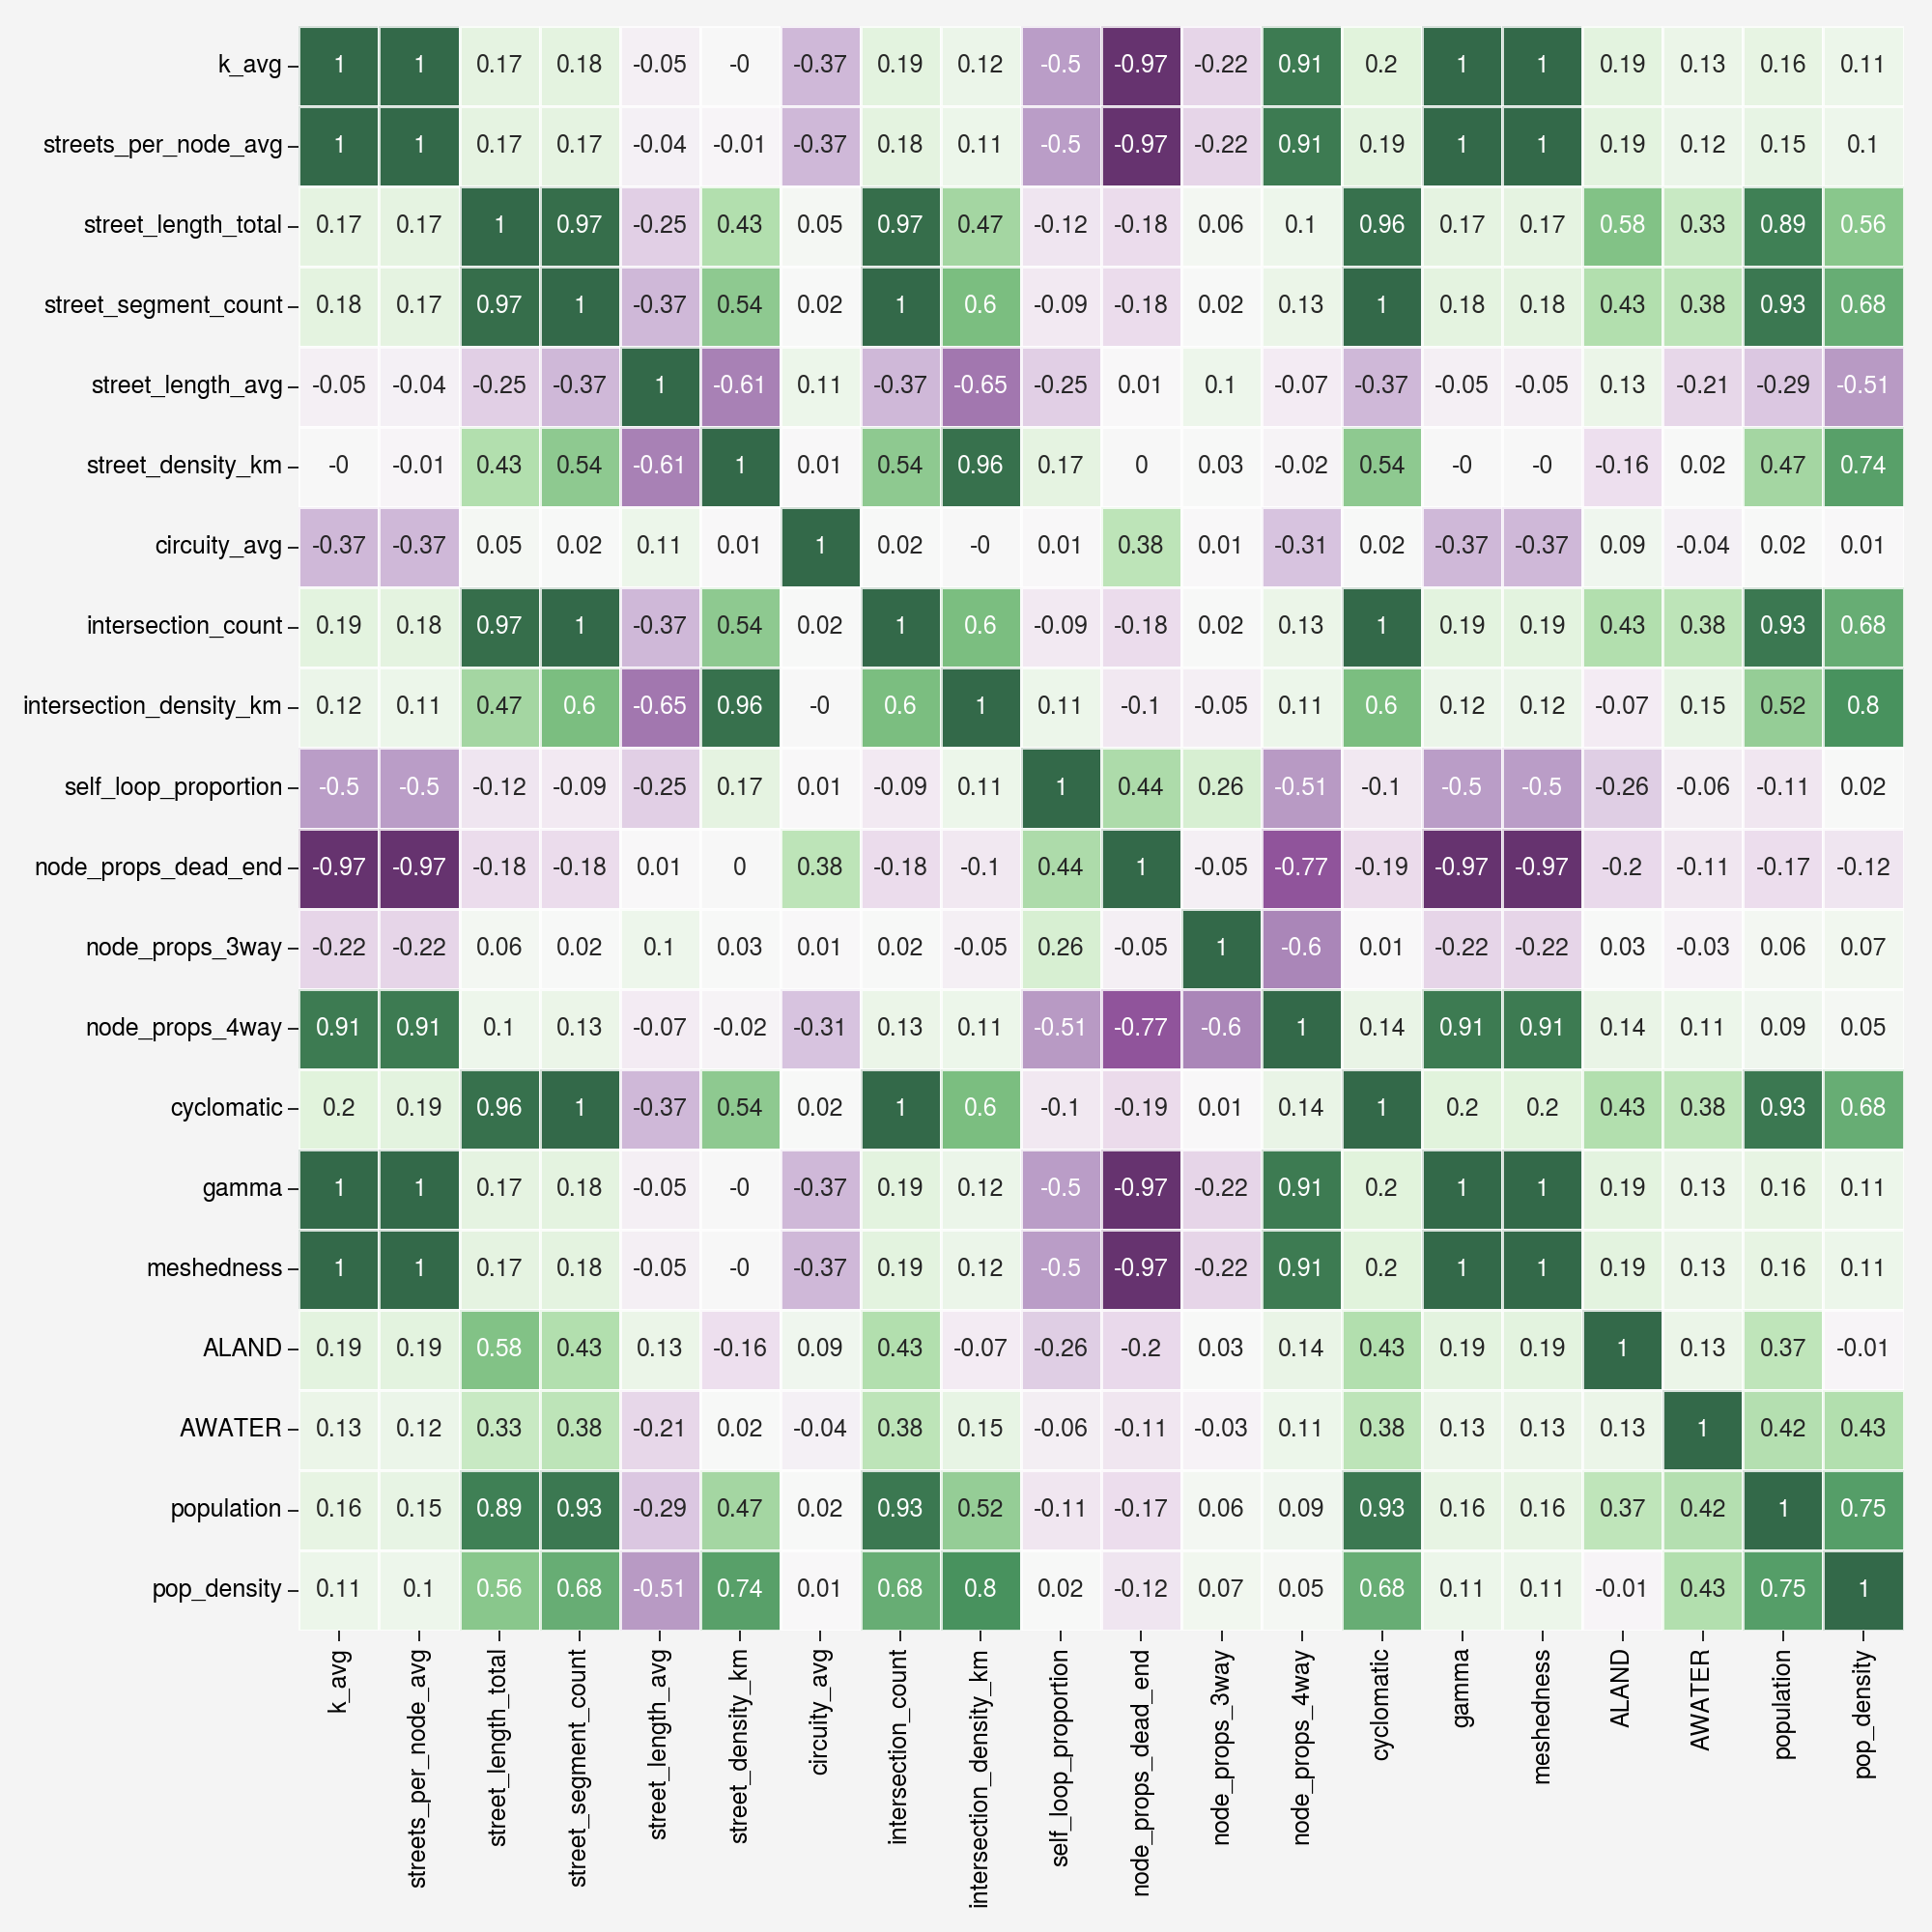

In [17]:
#fig, ax = pplt.subplots(figsize=(10,10))
#pplt.rc['linewidths'] =.5

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[features].corr().round(2),cmap='PrGn', annot=True, linewidth=.5,  square=True, cbar=False, alpha=0.8)
plt.minorticks_off()
plt.tight_layout()
plt.savefig("../paper/figures/corr_heatmap.png")

The clustermap makes this easier to explore by grouping together variables with large correlations

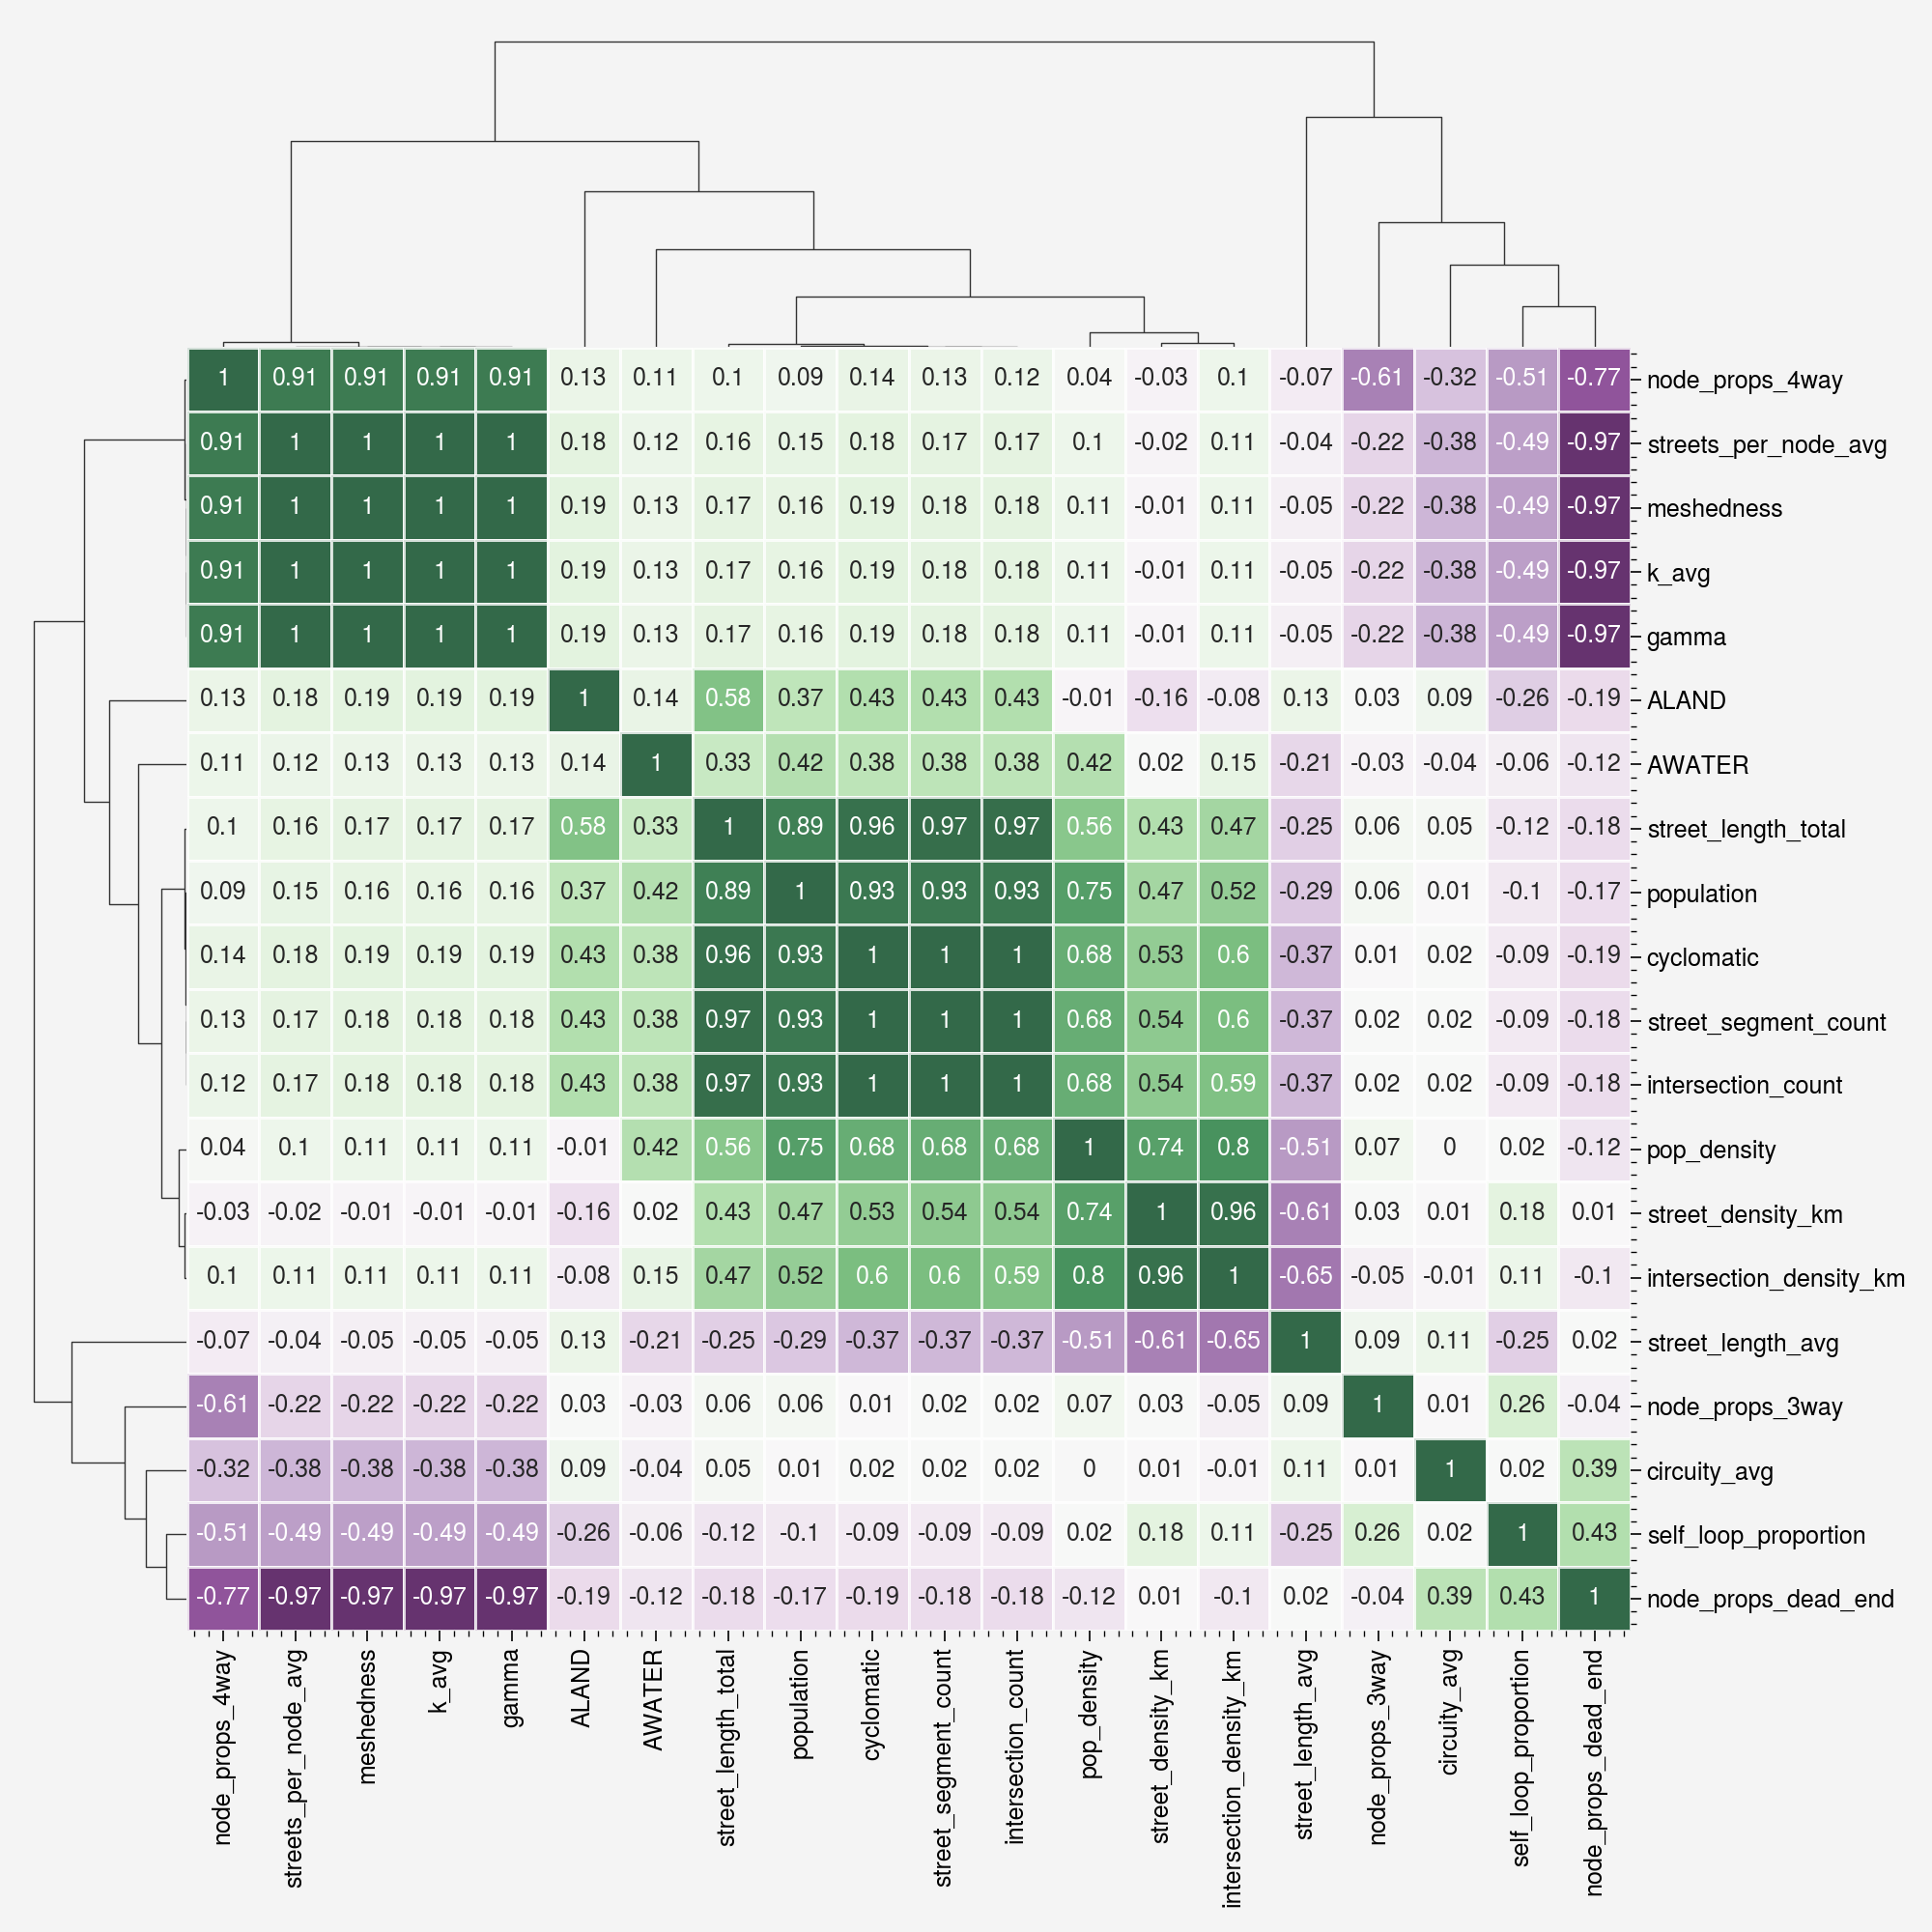

In [118]:
sns.clustermap(
    df[features].corr().round(2),
    cmap="PrGn",
    alpha=0.8,
    cbar_pos=(1, 0.2, 0.03, 0.4),
    dendrogram_ratio=(0.1, 0.2),
    annot=True,
    metric='correlation',
    linewidth=0.5
)


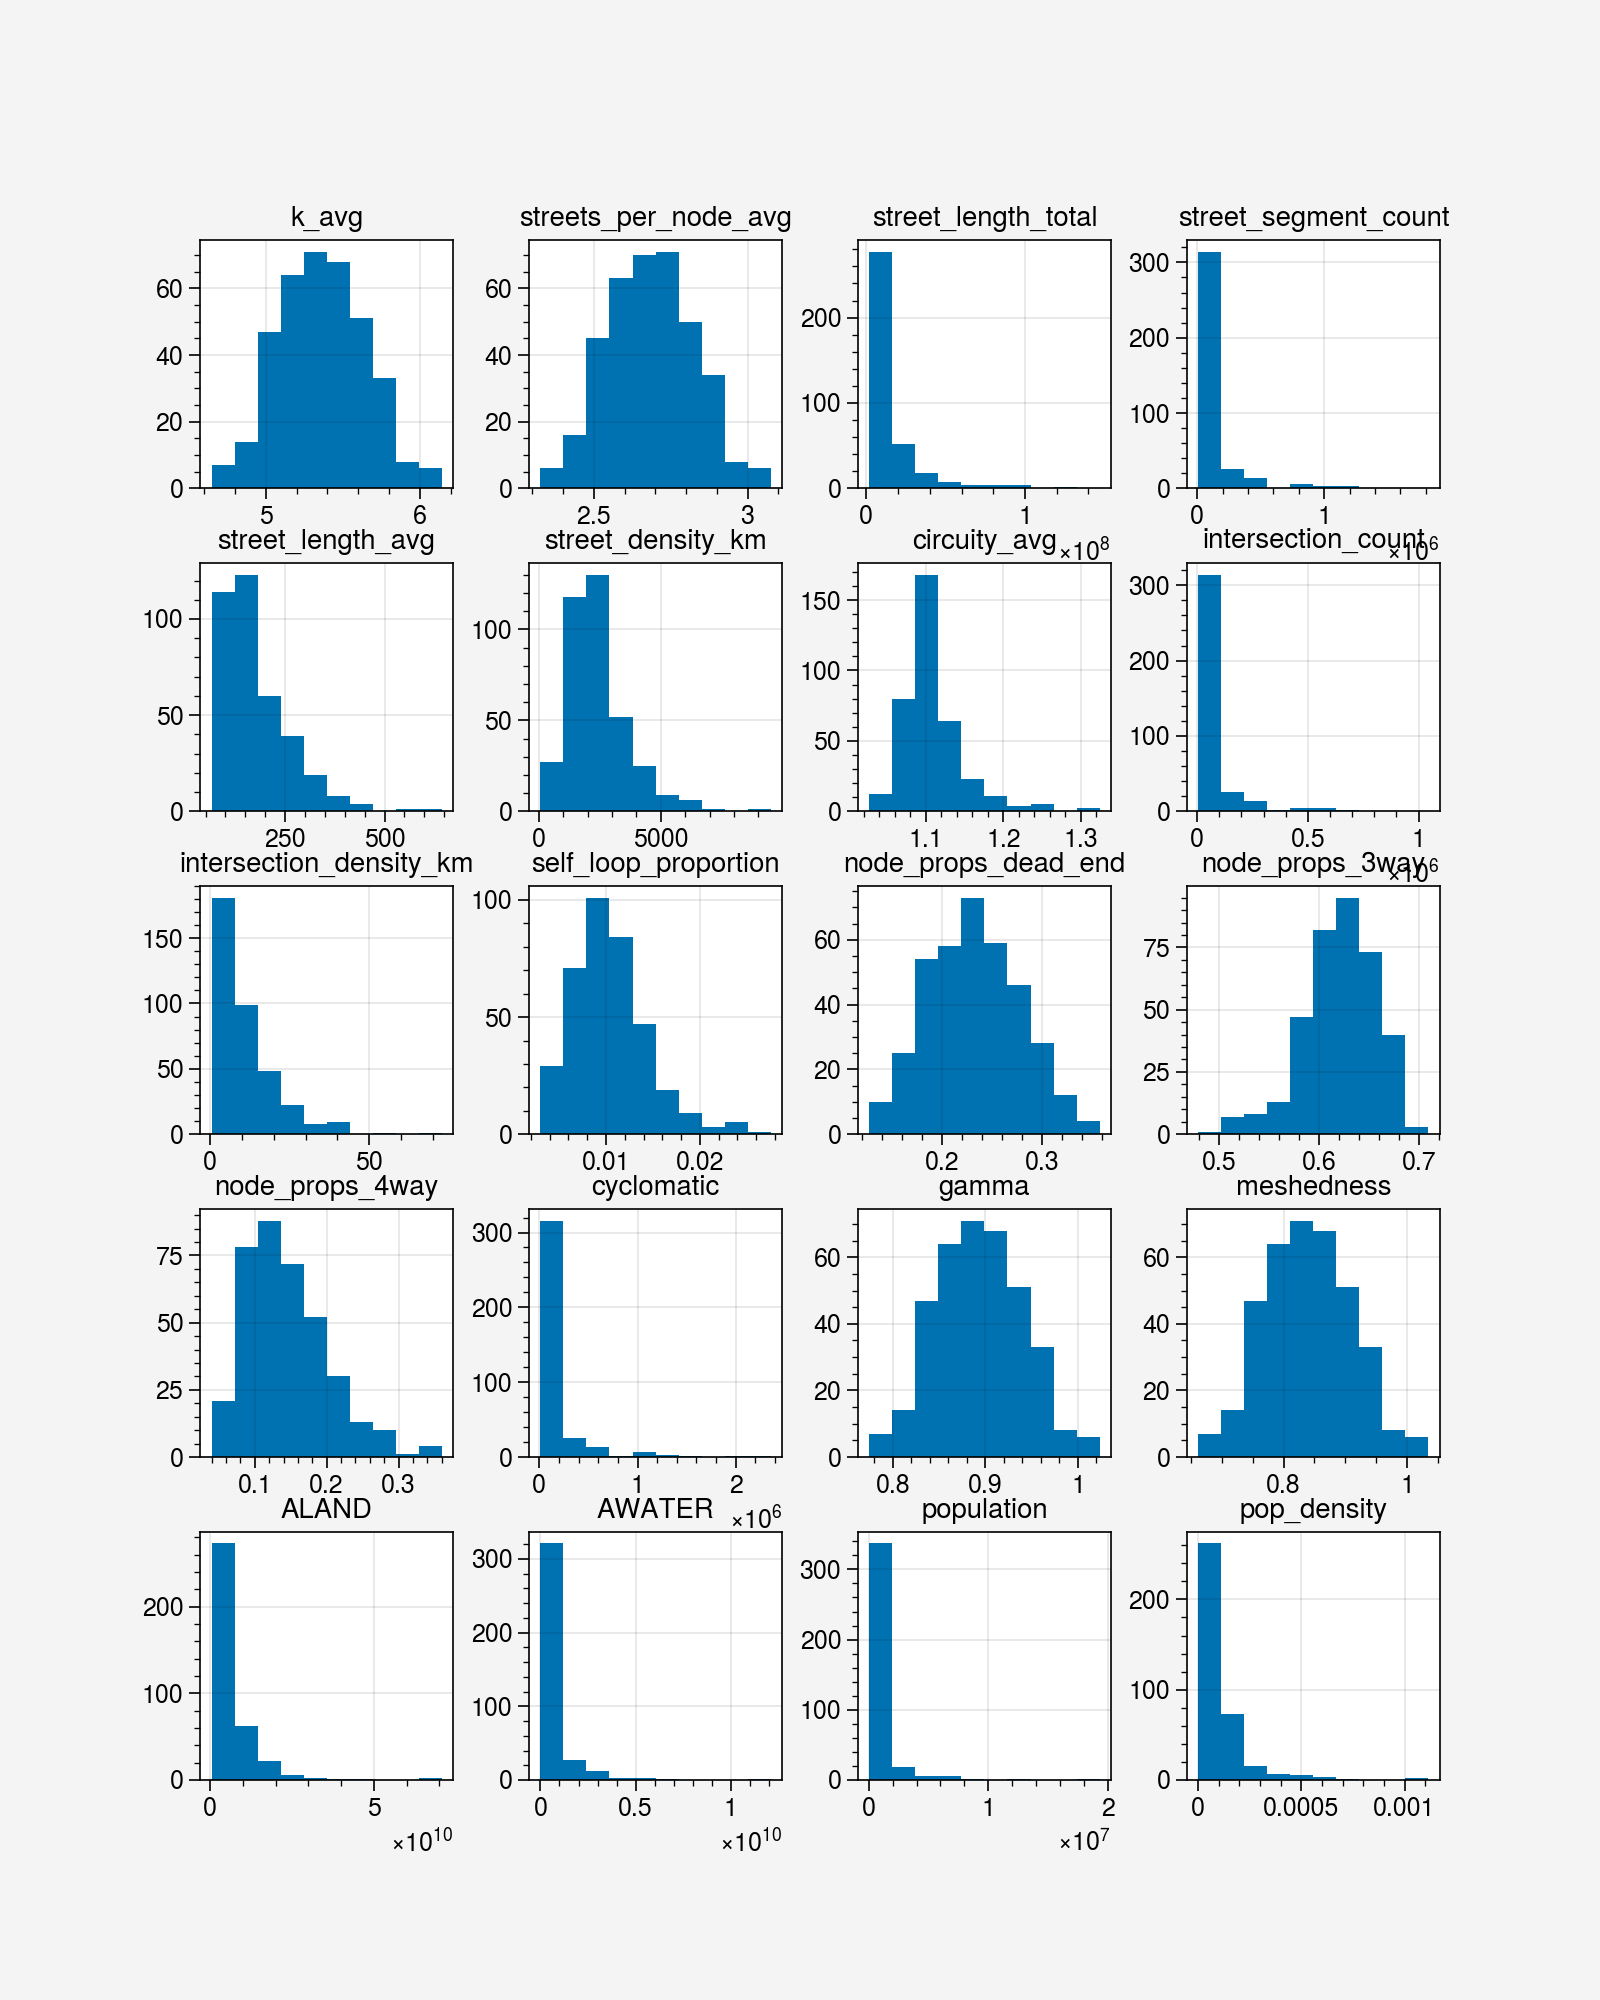

In [119]:
df[features].hist(figsize=(8,10))
plt.savefig('../paper/figures/variable_distributions.png')

Some of the variables should be log-transformed to normalize them

In [120]:
log_features = [
    "planar_measure",
    "network_measure",
    "streets_per_node_avg",
    "street_length_total",
    "street_segment_count",
    "street_length_avg",
    "street_density_km",
    "circuity_avg",
    "intersection_count",
    "intersection_density_km",
    "self_loop_proportion",
    "node_props_4way",
    "cyclomatic",
    "ALAND",
    "AWATER",
    'population',
    'pop_density',
    'pct_diff'
]

put the logvariables into a dict to use a pandas `apply` by mapping columns to functions

In [121]:
logmap = dict(zip(log_features, [np.log for i in range(len(log_features))]))

these variables are normally distributed, so z-standardize them to we're on the same scale

In [122]:
from scipy.stats import zscore

In [123]:
def z(series):
    return zscore(series, ddof=1)

In [124]:
# these variables are normal, so convert to Z. Others get logged in the formula

z_features = [
    "seg_difference",
    "self_loop_proportion",
    "node_props_dead_end",
    "node_props_3way",
    "meshedness",
    "k_avg",
    "gamma",


]

In [125]:
zmap = dict(zip(z_features, [z for i in range(len(z_features))]))

combine the dicts into a single mapping

In [126]:
mapper = {**logmap, **zmap}

In [127]:
mapper

{'planar_measure': <ufunc 'log'>,
 'network_measure': <ufunc 'log'>,
 'streets_per_node_avg': <ufunc 'log'>,
 'street_length_total': <ufunc 'log'>,
 'street_segment_count': <ufunc 'log'>,
 'street_length_avg': <ufunc 'log'>,
 'street_density_km': <ufunc 'log'>,
 'circuity_avg': <ufunc 'log'>,
 'intersection_count': <ufunc 'log'>,
 'intersection_density_km': <ufunc 'log'>,
 'self_loop_proportion': <function __main__.z(series)>,
 'node_props_4way': <ufunc 'log'>,
 'cyclomatic': <ufunc 'log'>,
 'ALAND': <ufunc 'log'>,
 'AWATER': <ufunc 'log'>,
 'population': <ufunc 'log'>,
 'pop_density': <ufunc 'log'>,
 'pct_diff': <ufunc 'log'>,
 'seg_difference': <function __main__.z(series)>,
 'node_props_dead_end': <function __main__.z(series)>,
 'node_props_3way': <function __main__.z(series)>,
 'meshedness': <function __main__.z(series)>,
 'k_avg': <function __main__.z(series)>,
 'gamma': <function __main__.z(series)>}

array([[<AxesSubplot:title={'center':'planar_measure'}>,
        <AxesSubplot:title={'center':'network_measure'}>,
        <AxesSubplot:title={'center':'streets_per_node_avg'}>,
        <AxesSubplot:title={'center':'street_length_total'}>,
        <AxesSubplot:title={'center':'street_segment_count'}>],
       [<AxesSubplot:title={'center':'street_length_avg'}>,
        <AxesSubplot:title={'center':'street_density_km'}>,
        <AxesSubplot:title={'center':'circuity_avg'}>,
        <AxesSubplot:title={'center':'intersection_count'}>,
        <AxesSubplot:title={'center':'intersection_density_km'}>],
       [<AxesSubplot:title={'center':'self_loop_proportion'}>,
        <AxesSubplot:title={'center':'node_props_4way'}>,
        <AxesSubplot:title={'center':'cyclomatic'}>,
        <AxesSubplot:title={'center':'ALAND'}>,
        <AxesSubplot:title={'center':'AWATER'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'pop_density'}>,
        <AxesS

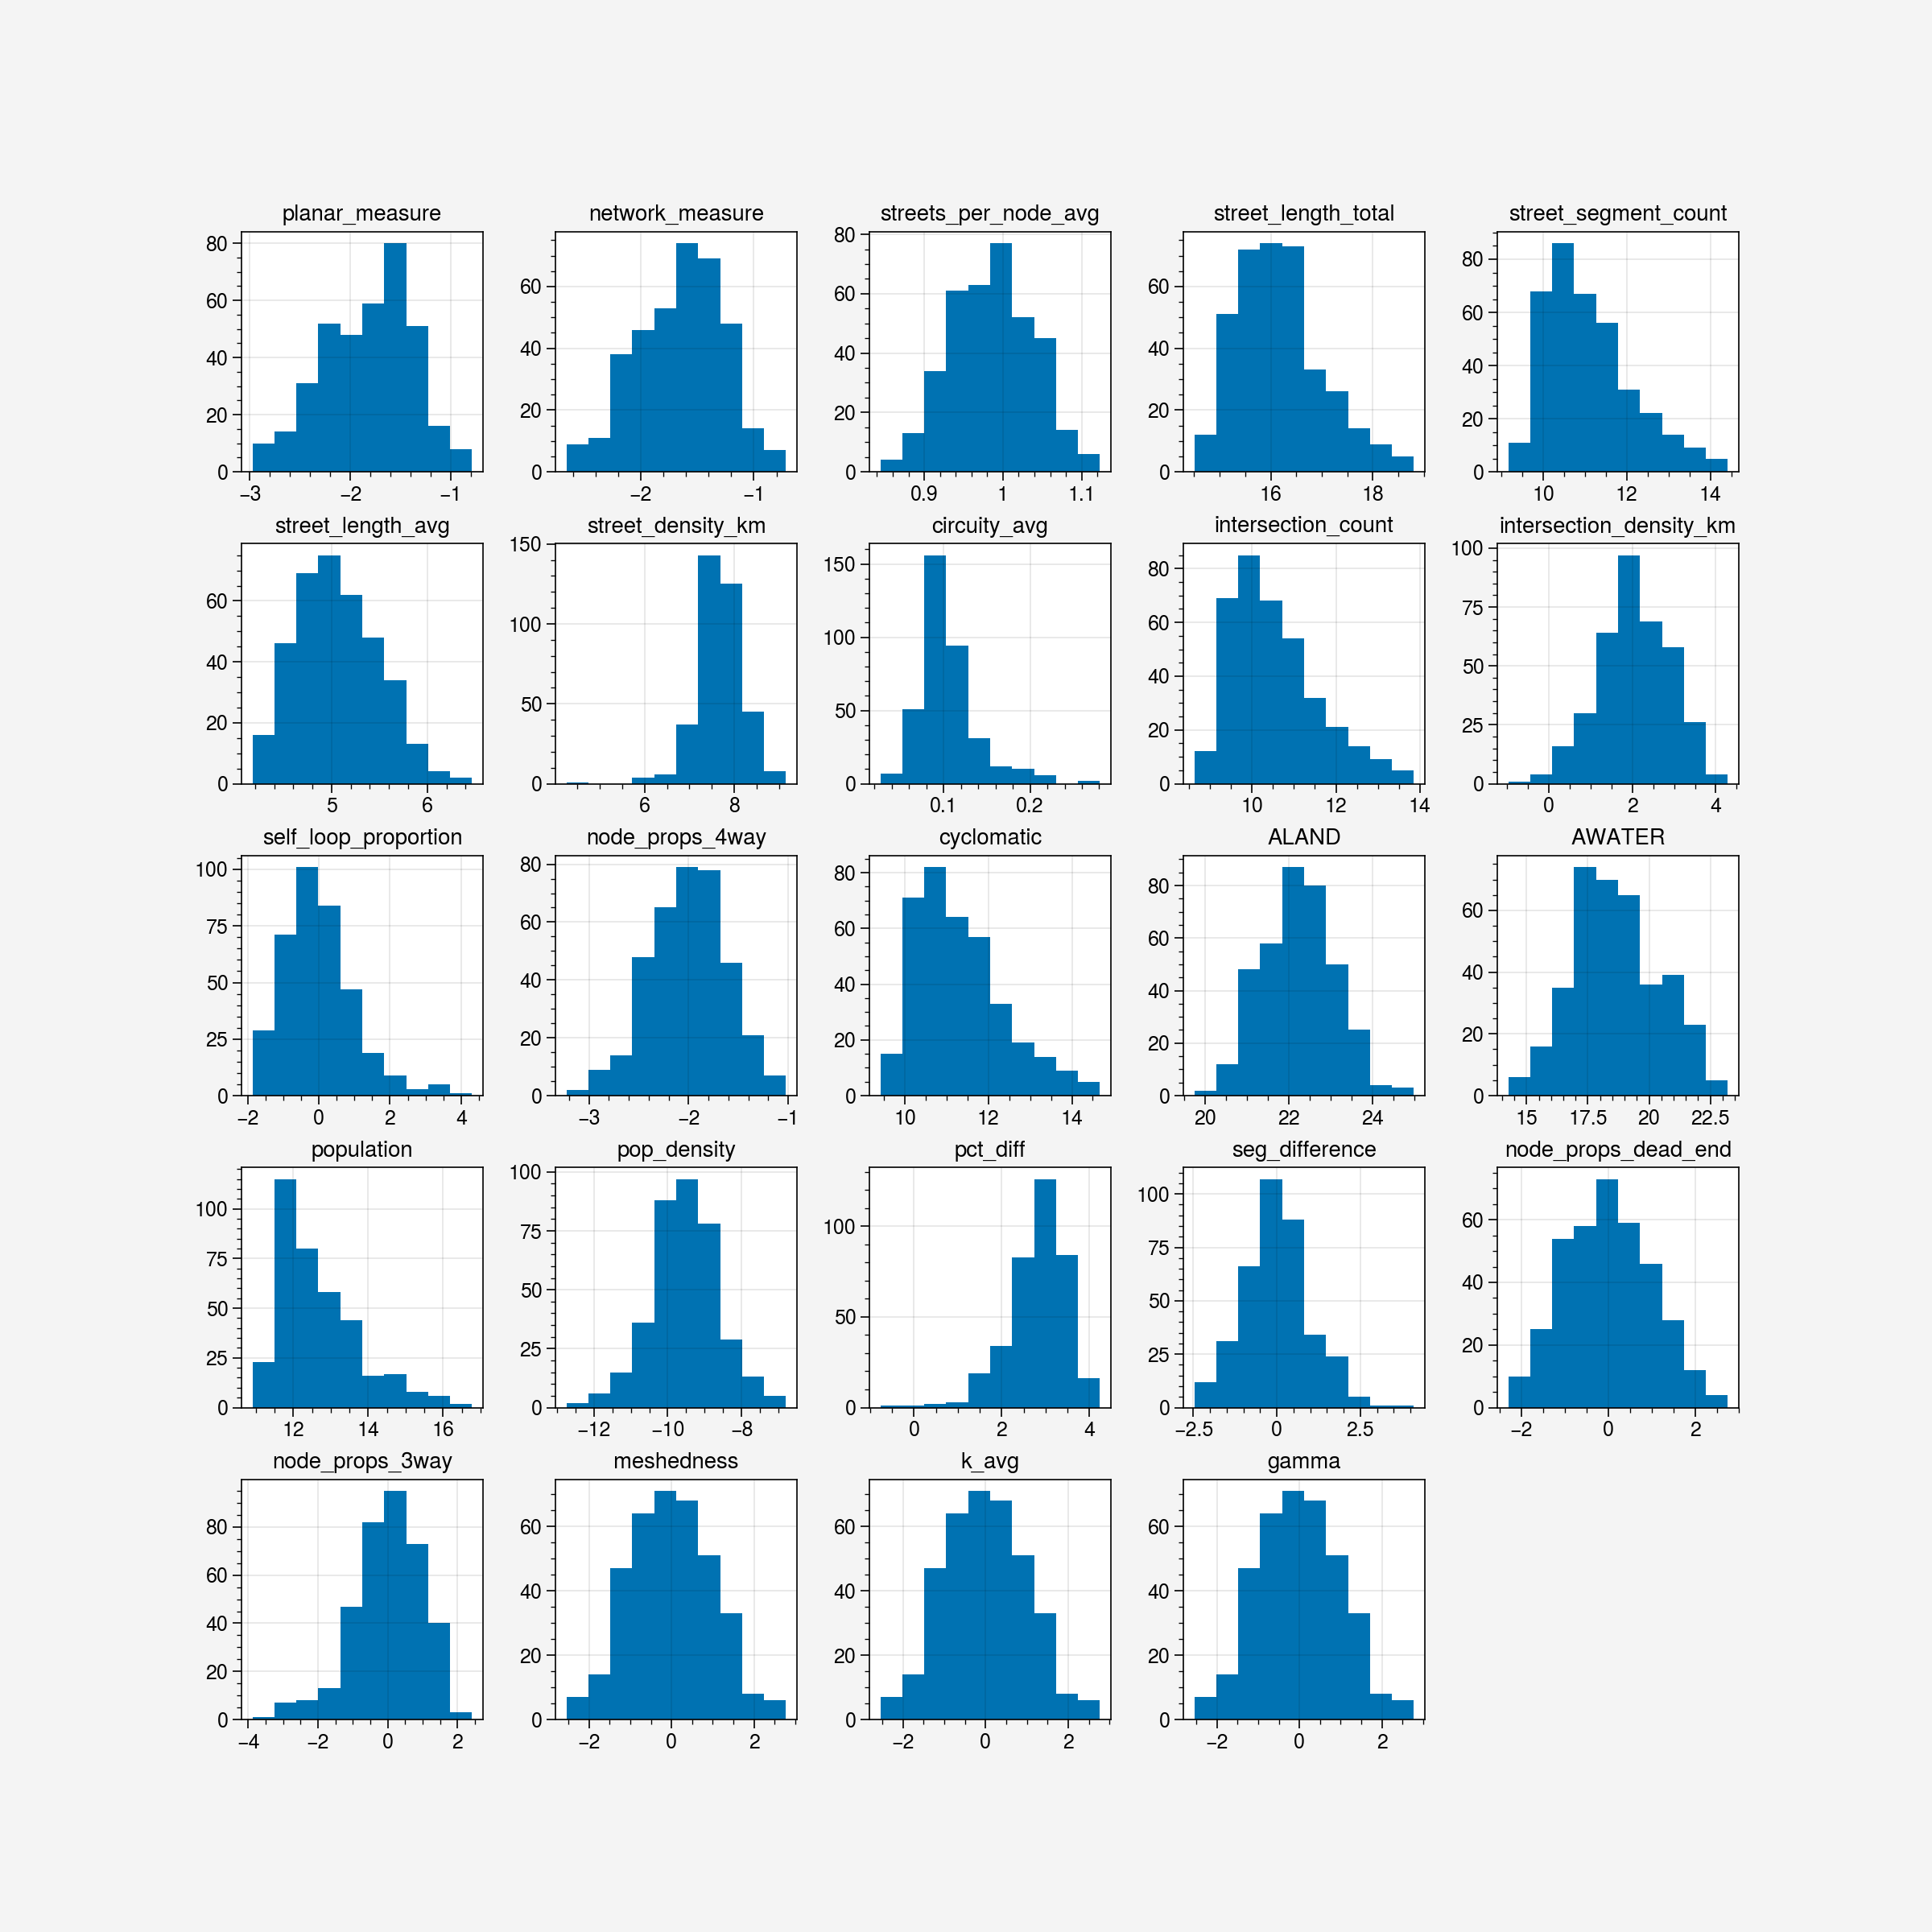

In [128]:
df.apply(mapper).hist(figsize=(12,12))

Now everyone looks normal, lets look at the clustermap again

/var/folders/79/cknfb1sx2pv16rztkpg6wzlw0000gn/T/ipykernel_15448/648469927.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


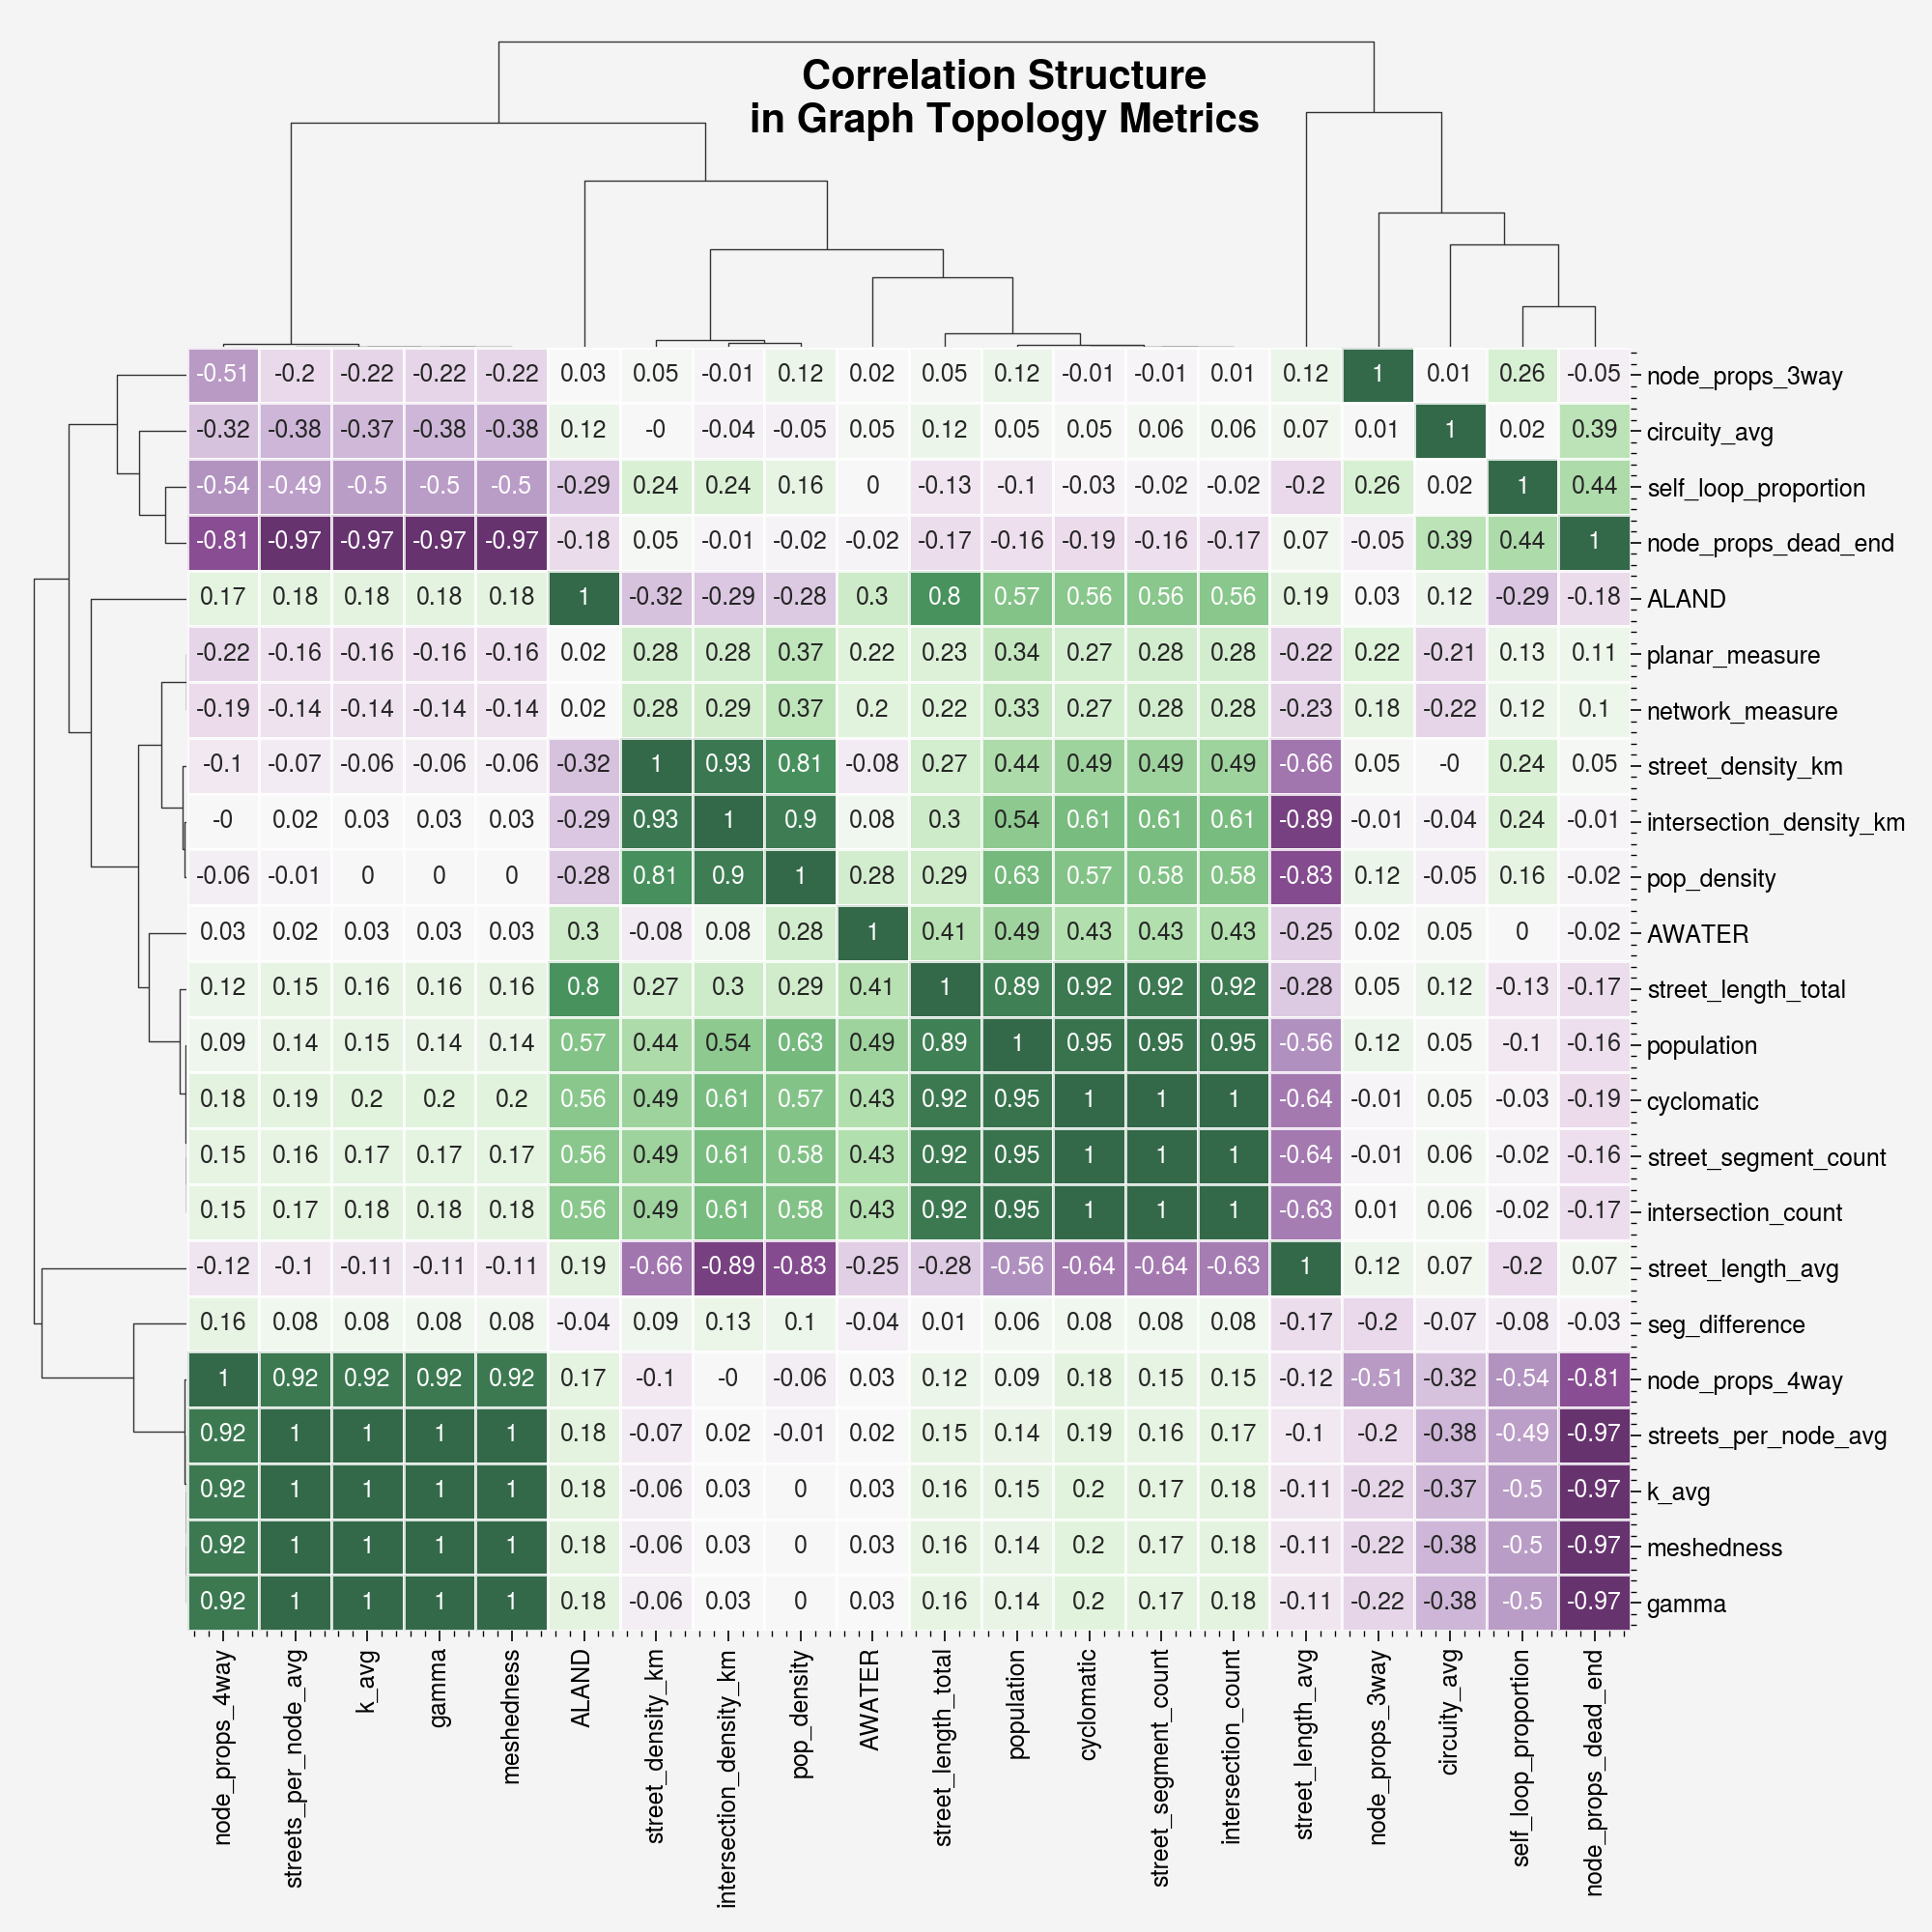

In [85]:
sns.clustermap(
    df.apply(mapper).corr()[features].round(2),
    cmap="PrGn",
    alpha=0.8,
    cbar_pos=(1, 0.2, 0.03, 0.4),
    dendrogram_ratio=(0.1, 0.2),
    annot=True,
    metric='correlation',
    linewidth=0.5
)

plt.suptitle('Correlation Structure\nin Graph Topology Metrics', fontsize=15, y=.97, x=.52)
plt.tight_layout()
plt.savefig("../paper/figures/clustermap.png")

From top left to bottom right, this gives us about 4 components:

- interconnectivity: everything is a function of node degree (k_avg)
    - node_props_4way 
    - streets_per_node_avg
    - k_avg
    - meshedness
    - gamma
- Density and land area: this is also weakly related to the next component...
    - ALAND
    - street_density_km
    - pop_density
    - AWATER
- Size
    - street_length_total
    - population
    - cyclomatic
    - street_segment_count
    - intersection_count
    - street_length_avg
- Randoms (maybe stoppages?): these arent much of a component, but kinda. It's also related to the interconnectivity component
    - circuity_avg
    - self_loop_proportion
    - node_props_dead_end


In [129]:
df.apply(mapper).to_parquet("../data/scaled_features.parquet")

In [130]:
df = df.apply(mapper)

array([[<AxesSubplot:title={'center':'planar_measure'}>,
        <AxesSubplot:title={'center':'network_measure'}>,
        <AxesSubplot:title={'center':'streets_per_node_avg'}>,
        <AxesSubplot:title={'center':'street_length_total'}>,
        <AxesSubplot:title={'center':'street_segment_count'}>],
       [<AxesSubplot:title={'center':'street_length_avg'}>,
        <AxesSubplot:title={'center':'street_density_km'}>,
        <AxesSubplot:title={'center':'circuity_avg'}>,
        <AxesSubplot:title={'center':'intersection_count'}>,
        <AxesSubplot:title={'center':'intersection_density_km'}>],
       [<AxesSubplot:title={'center':'self_loop_proportion'}>,
        <AxesSubplot:title={'center':'node_props_4way'}>,
        <AxesSubplot:title={'center':'cyclomatic'}>,
        <AxesSubplot:title={'center':'ALAND'}>,
        <AxesSubplot:title={'center':'AWATER'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'pop_density'}>,
        <AxesS

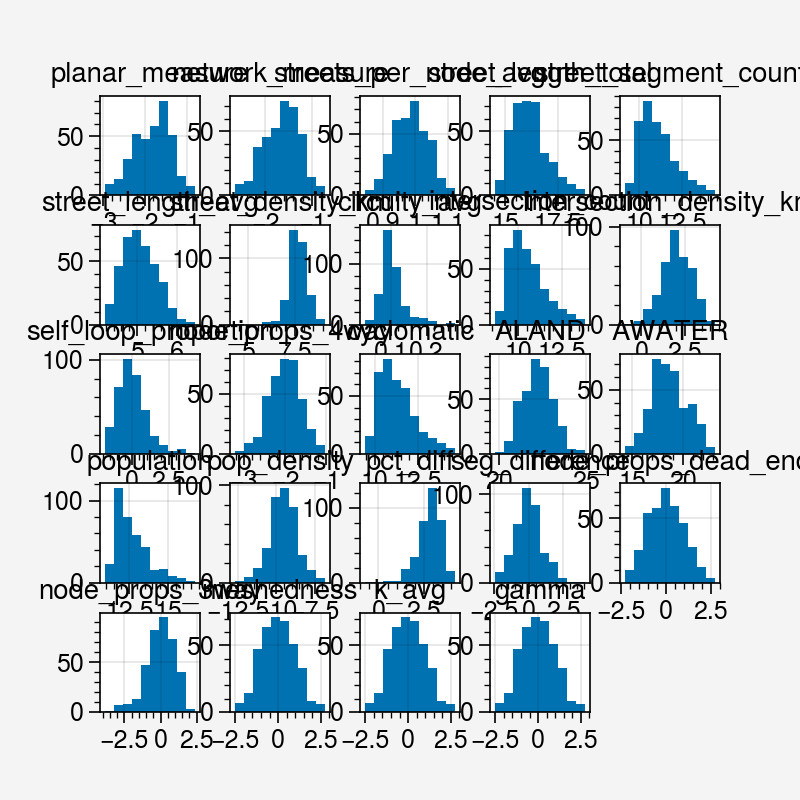

In [131]:
df.hist()

In [140]:
feature_subset = [
    "street_length_total",
    "street_length_avg",
    "street_density_km",
    "circuity_avg",
    "intersection_density_km",
    "self_loop_proportion",
    "node_props_3way",
    "node_props_4way",
    "cyclomatic",
    "meshedness",
    "ALAND",
    "AWATER",
    'population',
    'pop_density'
]

In [146]:
''.join(f'{i}+' for i in feature_subset)

'street_length_total+street_length_avg+street_density_km+circuity_avg+intersection_density_km+self_loop_proportion+node_props_3way+node_props_4way+cyclomatic+meshedness+ALAND+AWATER+population+pop_density+'

In [143]:
s

<generator object <genexpr> at 0x3013e03c0>

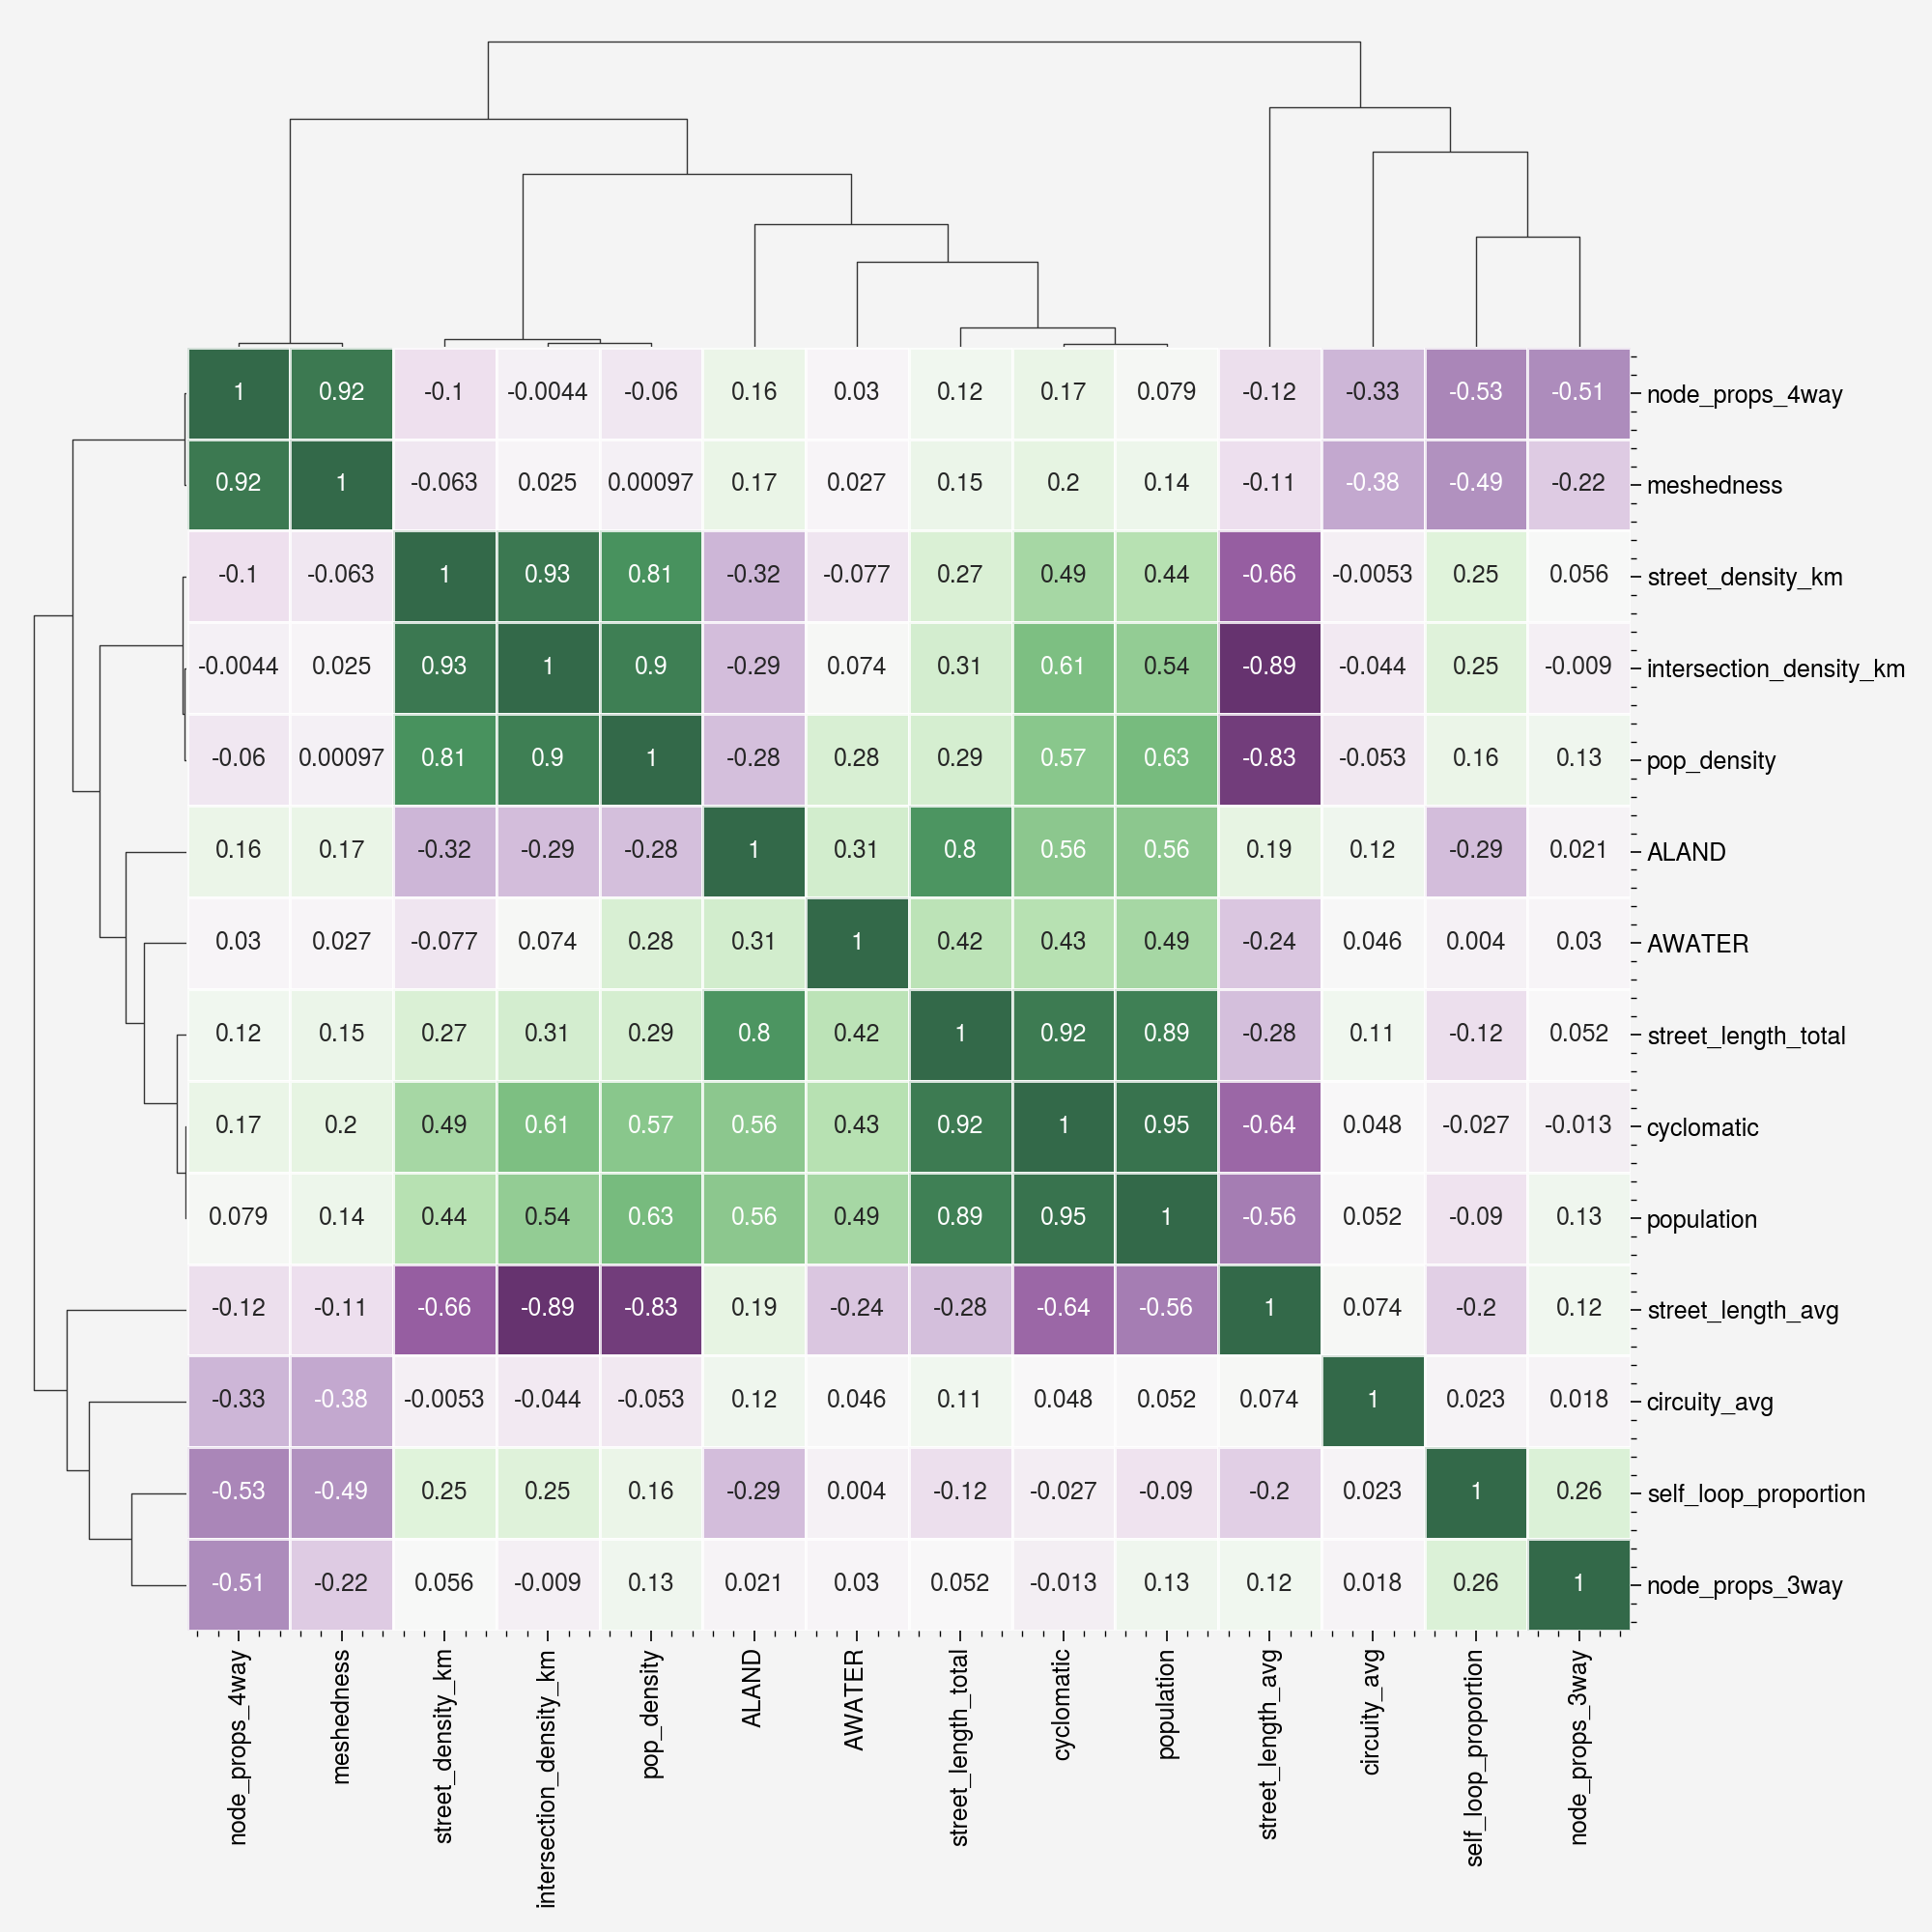

In [141]:
sns.clustermap(df[feature_subset].corr(),    cmap="PrGn",
    alpha=0.8,
    cbar_pos=(1, 0.2, 0.03, 0.4),
    dendrogram_ratio=(0.1, 0.2),
    annot=True,
    metric='correlation',
    linewidth=0.5)